In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pandas: Used for data manipulation and analysis, particularly for working with structured data in the form of DataFrames.
numpy: Provides support for mathematical operations, particularly those involving arrays and numerical computations.
matplotlib.pyplot and seaborn: Libraries for visualizing data. Seaborn is built on top of Matplotlib and provides a high-level interface for attractive visualizations.

In [3]:
# Load the dataset
file_path = 'student_participation_feedback_dataset.csv'
data = pd.read_csv(file_path)

The file path is specified, and the dataset is loaded into a DataFrame using pd.read_csv().

In [4]:
# Inspect the dataset
print("Dataset Overview:")
print(data.info())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   student_id                  200 non-null    int64 
 1   interaction_duration (min)  200 non-null    int64 
 2   feedback_rating (1-5)       200 non-null    int64 
 3   assignments_completed       200 non-null    int64 
 4   total_interactions          200 non-null    int64 
 5   quiz_score (%)              200 non-null    int64 
 6   final_grade                 200 non-null    object
 7   engagement_score            200 non-null    int64 
 8   age                         200 non-null    int64 
 9   learning_style              200 non-null    object
 10  participation_label         200 non-null    object
dtypes: int64(8), object(3)
memory usage: 17.3+ KB
None


Displays the structure of the dataset, including column names, data types, and non-null counts. This is useful for understanding the dataset's structure and spotting missing values.

In [5]:
# Select numeric columns for analysis
numeric_columns = data.select_dtypes(include=[np.number]).columns
print("\nNumeric Columns:", numeric_columns)



Numeric Columns: Index(['student_id', 'interaction_duration (min)', 'feedback_rating (1-5)',
       'assignments_completed', 'total_interactions', 'quiz_score (%)',
       'engagement_score', 'age'],
      dtype='object')


Extracts all numeric columns (e.g., integers, floats) using select_dtypes(include=[np.number]).
columns retrieves the column names for further processing.
Prints the numeric columns for reference.

In [6]:
# Define functions for outlier detection

def detect_outliers_zscore(df, column, threshold=3):
    z_scores = (df[column] - df[column].mean()) / df[column].std()
    return df[np.abs(z_scores) > threshold]

def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]


Z-score Method
Z-score:
Measures how far a value is from the mean in terms of standard deviations.
Formula: 
𝑍
=
𝑥
−
𝜇
𝜎
Z= 
σ
x−μ
​
 , where:
𝑥
x = data point
𝜇
μ = mean of the column
𝜎
σ = standard deviation of the column
Threshold:
Any Z-score above or below a certain threshold (default = 3) is flagged as an outlier.
Filter:
Values with 
∣
𝑍
∣
>
3
∣Z∣>3 are retained and returned as outliers.

IQR Method

Quartiles:
𝑄
1
Q1: First quartile (25th percentile).
𝑄
3
Q3: Third quartile (75th percentile).
IQR:
Interquartile range = 
𝑄
3
−
𝑄
1
Q3−Q1.
Bounds:
Lower bound = 
𝑄
1
−
1.5
×
IQR
Q1−1.5×IQR.
Upper bound = 
𝑄
3
+
1.5
×
IQR
Q3+1.5×IQR.
Filter:
Any value below the lower bound or above the upper bound is flagged as an outlier.

In [7]:
# Apply outlier detection methods
outlier_summary = {}

for column in numeric_columns:
    print(f"\nAnalyzing column: {column}")
    zscore_outliers = detect_outliers_zscore(data, column)
    iqr_outliers = detect_outliers_iqr(data, column)

    outlier_summary[column] = {
        "Z-score Outliers": zscore_outliers.shape[0],
        "IQR Outliers": iqr_outliers.shape[0]
    }



Analyzing column: student_id

Analyzing column: interaction_duration (min)

Analyzing column: feedback_rating (1-5)

Analyzing column: assignments_completed

Analyzing column: total_interactions

Analyzing column: quiz_score (%)

Analyzing column: engagement_score

Analyzing column: age


Analyze Each Numeric Column

python code
outlier_summary = {}

An empty dictionary to store the number of outliers for each column using both methods.

Loop Through Numeric Columns

Iterates through each numeric column:
Logs the column being analyzed.
Detects Z-score outliers using detect_outliers_zscore.
Detects IQR outliers using detect_outliers_iqr.
Stores the count of outliers for both methods in the outlier_summary dictionary.

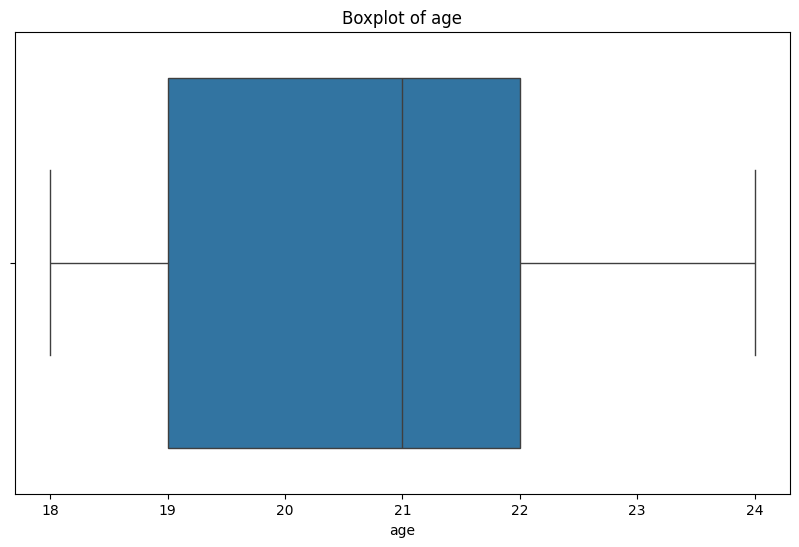

In [9]:
# Visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=data[column])
plt.title(f"Boxplot of {column}")
plt.show()

Boxplot: Visual representation of data distribution and outliers.
The box represents the IQR.
Whiskers extend to 1.5 times the IQR.
Points outside the whiskers are outliers.

In [10]:
# Display summary of outliers
outlier_summary_df = pd.DataFrame(outlier_summary).T
print("\nOutlier Summary:")
print(outlier_summary_df)


Outlier Summary:
                            Z-score Outliers  IQR Outliers
student_id                                 0             0
interaction_duration (min)                 0             0
feedback_rating (1-5)                      0             0
assignments_completed                      0             0
total_interactions                         0             0
quiz_score (%)                             0             0
engagement_score                           0             0
age                                        0             0


Converts the outlier_summary dictionary into a DataFrame for easier viewing.
Transposes (T) the DataFrame to make columns the index and methods the columns.
Prints the summary showing the count of Z-score and IQR outliers for each variable.

In [13]:
# Save the outlier summary for further investigation
output_path = 'outlier_summary.csv'
outlier_summary_df.to_csv(output_path)
print(f"\nOutlier summary saved to: {output_path}")



Outlier summary saved to: outlier_summary.csv


In [16]:

data1 = pd.read_csv(output_path)
data1.head()

,Unnamed: 0,Z-score Outliers,IQR Outliers
0,student_id,0,0
1,interaction_duration (min),0,0
2,feedback_rating (1-5),0,0
3,assignments_completed,0,0
4,total_interactions,0,0
